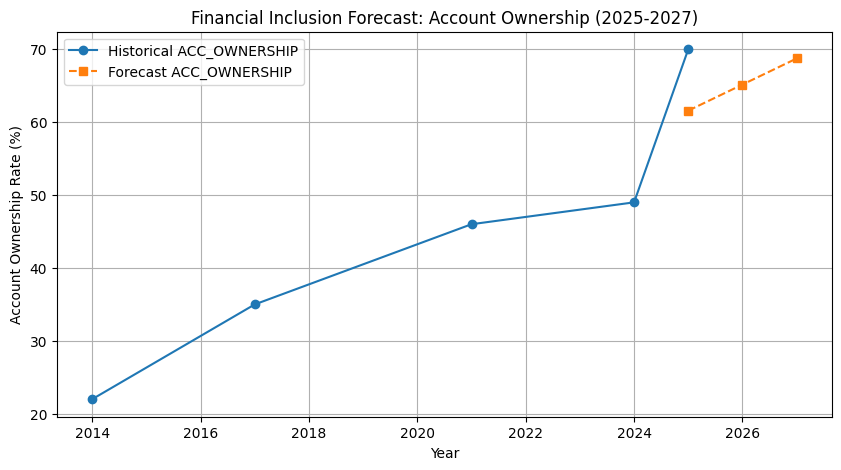

,year,ACC_OWNERSHIP
0,2025,61.576037
1,2026,65.154378
2,2027,68.732719


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Prepare historical data
df_acc = data[['observation_date', 'indicator_code', 'value_numeric']]
df_acc = df_acc[df_acc['indicator_code'] == 'ACC_OWNERSHIP'].dropna(subset=['value_numeric'])

# Convert date to year for trend
df_acc['year'] = df_acc['observation_date'].dt.year
df_acc_grouped = df_acc.groupby('year')['value_numeric'].mean().reset_index()

# 2. Fit a simple linear trend
X = df_acc_grouped[['year']]
y = df_acc_grouped['value_numeric']
model = LinearRegression().fit(X, y)

# Forecast 2025-2027
future_years = pd.DataFrame({'year': [2025, 2026, 2027]})
future_forecast = model.predict(future_years)

forecast_df = future_years.copy()
forecast_df['ACC_OWNERSHIP'] = future_forecast

# 3. Plot historical + forecast
plt.figure(figsize=(10,5))
plt.plot(df_acc_grouped['year'], df_acc_grouped['value_numeric'], 'o-', label='Historical ACC_OWNERSHIP')
plt.plot(forecast_df['year'], forecast_df['ACC_OWNERSHIP'], 's--', label='Forecast ACC_OWNERSHIP')
plt.xlabel('Year')
plt.ylabel('Account Ownership Rate (%)')
plt.title('Financial Inclusion Forecast: Account Ownership (2025-2027)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Display forecast table
display(forecast_df)
